<a href="https://colab.research.google.com/github/saks0106/ML_Frequent-Lookouts/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KNN

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [3]:
df = pd.read_csv('/content/wisc_bc_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

In [5]:
df.shape

(569, 32)

In [6]:
df['diagnosis'] = df['diagnosis'].astype('category')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 569 non-null    int64   
 1   diagnosis          569 non-null    category
 2   radius_mean        569 non-null    float64 
 3   texture_mean       569 non-null    float64 
 4   perimeter_mean     569 non-null    float64 
 5   area_mean          569 non-null    float64 
 6   smoothness_mean    569 non-null    float64 
 7   compactness_mean   569 non-null    float64 
 8   concavity_mean     569 non-null    float64 
 9   points_mean        569 non-null    float64 
 10  symmetry_mean      569 non-null    float64 
 11  dimension_mean     569 non-null    float64 
 12  radius_se          569 non-null    float64 
 13  texture_se         569 non-null    float64 
 14  perimeter_se       569 non-null    float64 
 15  area_se            569 non-null    float64 
 16  smoothne

In [8]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [9]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [10]:
df.groupby('diagnosis').count()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,357
M,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,212


In [11]:
df.drop('id',axis=1,inplace=True)

In [12]:
df.corr()


<ipython-input-12-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [13]:
df.duplicated().sum()

0

In [14]:
X = df.drop('diagnosis',axis=1)
y = df['diagnosis']

In [15]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

XScaled  = X.apply(zscore)  # convert all attributes to Z scale , 

XScaled.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.576556e-16,-7.711075e-16,-1.186319e-16,-2.029230e-16,1.717041e-16,1.935573e-16,4.058460e-17,-5.619407e-17,1.638994e-16,-1.492265e-15,...,-9.209583e-17,1.560946e-18,-3.777490e-16,-1.779479e-16,-2.239958e-16,9.365678e-18,9.053488e-17,2.263372e-16,2.684828e-16,2.044840e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


In [16]:
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.30, random_state=1)


#Build KNN Model

In [17]:
nnh = KNeighborsClassifier()
#distance means smallest distance will be considered, if weights=uniform that equal distance is considered

In [18]:
nnh.fit(X_train, y_train)

KNeighborsClassifier()

Evaluate Performance of kNN Model

In [19]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will chosen
  # be assigned to the test data point

y_preds = nnh.predict(X_test)
y_preds

array(['M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'M'], dtype=object)

In [20]:
nnh.score(X_train,y_train)

0.9773869346733668

In [21]:
nnh.score(X_test, y_test)

0.9649122807017544

In [35]:
#predicting on custom data
preds = np.array(df.sample(1)).flatten()[1:]
preds = preds.reshape(1,30)

In [36]:
nnh.predict(preds)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['M'], dtype=object)

Confusion Matrix


<Axes: >

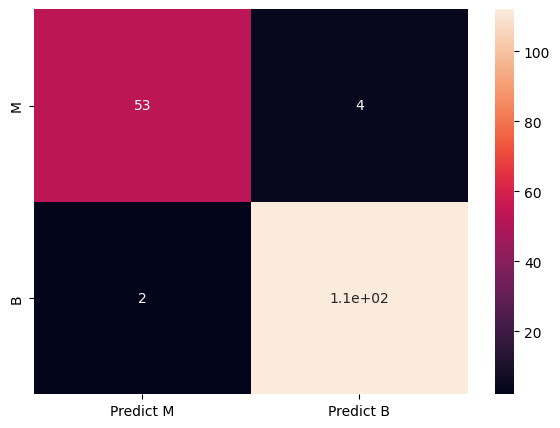

In [42]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_preds, labels=["M", "B"])

df_cm = pd.DataFrame(cm, index = [i for i in ["M","B"]],
                  columns = [i for i in ["Predict M","Predict B"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [40]:
from sklearn.metrics import confusion_matrix
error_train = []
error_test = []
for i in range(1,26):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  x = confusion_matrix(y_train,knn.predict(X_train))
  y = confusion_matrix(y_test,knn.predict(X_test))
  error_train.append((x[0][1]+x[1][0])/x.sum())
  error_test.append((y[0][1]+y[1][0])/x.sum())

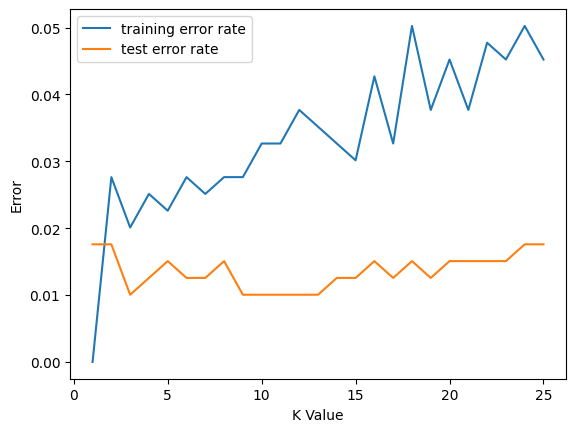

In [41]:
plt.plot(range(1,26),error_train,label='training error rate')
plt.plot(range(1,26),error_test,label='test error rate')
plt.xlabel('K Value')
plt.ylabel('Error')
plt.legend()

Choosing the right k is not easy and is subjective. Usually choose as an odd number is choosen.
A small k captures too much training noise and hence does not do well in test data. A very large k does so much smoothening that it does not manage to capture information in the training data sufficiently - and hence does not do well in test data.
If the number of classes is 2, many suggest a rule of thumb approach(set k=sqrt(n)), that might not be the best but does well mostly.

finding best k value without cross_val

In [ ]:
scores =[]
for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(X_train, y_train)
    scores.append(NNH.score(X_test, y_test))

Text(0, 0.5, 'Accuracy')

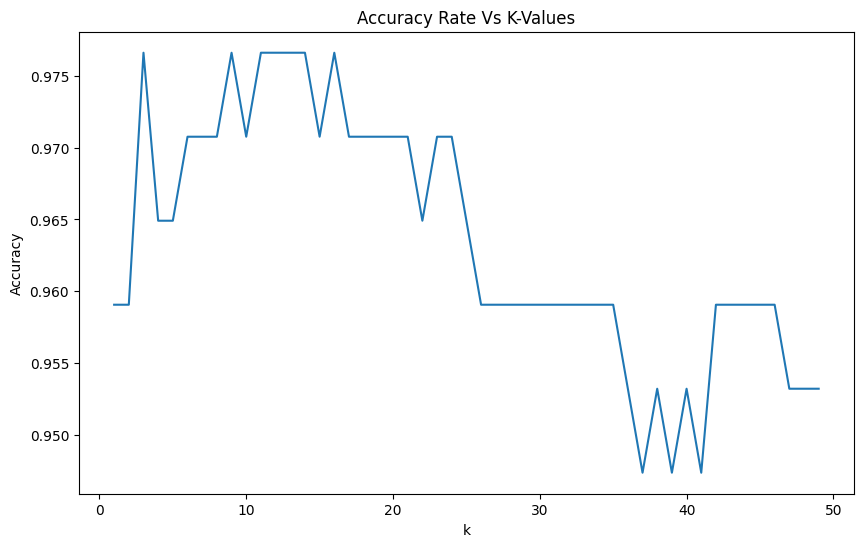

In [ ]:


plt.figure(figsize=(10,6))
plt.plot(range(1,50),scores)
plt.title('Accuracy Rate Vs K-Values')
plt.xlabel('k')
plt.ylabel('Accuracy')
#Choose k to be an odd value

finding best k value with cross_val

In [ ]:
from sklearn.model_selection import cross_val_score
scores_1 = []

for i in range(1,50):
  KNN2 = KNeighborsClassifier(n_neighbors=i)
  scores = cross_val_score(KNN2,XScaled,y,cv=10)
  scores_1.append(scores.mean())

Text(0, 0.5, 'Accuracy')

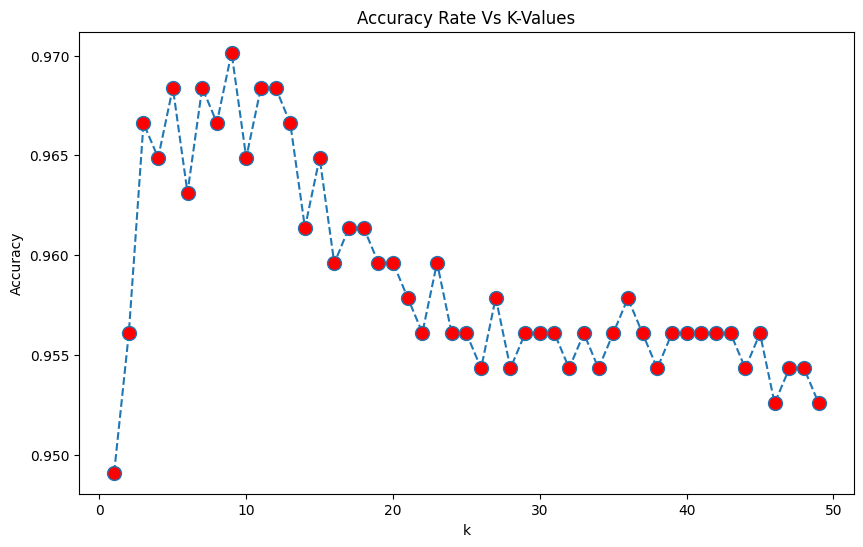

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),scores_1,linestyle='dashed',marker='o', markerfacecolor='red',markersize=10)
plt.title('Accuracy Rate Vs K-Values')
plt.xlabel('k')
plt.ylabel('Accuracy')
#Choose k to be an odd value

###HyperParameter Tuning using GridSearchCV

###**weights -** 
**uniform** - all points are weighted uniformly.

 **distance** - closer neighbors of query point will have greater influence than farther away points

###**algorithm -**
**ball_tree** and **kd_tree** are tree based algorithm

**brute**  - test points we calculate distance from every training point

**auto** - will decide which algorithm to choose



In [ ]:
from sklearn.model_selection import GridSearchCV, KFold

# Create 3 folds
seed = 13
kfold = KFold(n_splits=3, shuffle=True, random_state=seed)

# Define our candidate hyperparameters
hp_candidates = [{'n_neighbors': [5,7,9,10,11,12], 'weights': ['uniform','distance']}]

# Search for best hyperparameters
grid = GridSearchCV(estimator=nnh, param_grid=hp_candidates, cv=kfold, scoring='accuracy')
grid.fit(X, y)




GridSearchCV(cv=KFold(n_splits=3, random_state=13, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [5, 7, 9, 10, 11, 12],
                          'weights': ['uniform', 'distance']}],
             scoring='accuracy')

In [ ]:
# Get the results
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.9384758191775736
KNeighborsClassifier(n_neighbors=11, weights='distance')
{'n_neighbors': 11, 'weights': 'distance'}


In [ ]:
grid.cv_results_

{'mean_fit_time': array([0.00367562, 0.00288661, 0.00298023, 0.00286078, 0.00367276,
        0.00282939, 0.00722329, 0.0036788 , 0.00350984, 0.00384887,
        0.00362698, 0.00629028]),
 'std_fit_time': array([1.07127918e-03, 1.17390480e-04, 1.35865263e-04, 8.18754071e-05,
        1.09203265e-03, 8.57799728e-05, 5.62743864e-03, 2.28827523e-04,
        4.71086087e-04, 7.09993565e-04, 5.76723400e-04, 3.52514335e-03]),
 'mean_score_time': array([0.01078065, 0.00452407, 0.0103368 , 0.00561364, 0.01037717,
        0.0046227 , 0.01778189, 0.00855176, 0.02098775, 0.00918094,
        0.01350673, 0.01013199]),
 'std_score_time': array([5.93879140e-04, 1.44206827e-04, 1.09614712e-04, 1.57567822e-03,
        1.84071908e-05, 1.07363745e-04, 5.95272714e-03, 2.51364916e-03,
        7.39717266e-03, 1.27675463e-03, 1.67140405e-03, 3.75759221e-03]),
 'param_n_neighbors': masked_array(data=[5, 5, 7, 7, 9, 9, 10, 10, 11, 11, 12, 12],
              mask=[False, False, False, False, False, False, False, F

In [ ]:
nnh2 = KNeighborsClassifier(n_neighbors=11,weights='distance')
nnh2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11, weights='distance')

In [ ]:
nnh2.score(X_test,y_test)


0.9766081871345029

In [ ]:
nnh2.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 11,
 'p': 2,
 'weights': 'distance'}

In [ ]:
param_grid_knn = {'n_neighbors':list(range(1,15)), 
              'algorithm':('auto', 'ball_tree', 'kd_tree', 'brute'),
              'weights': ['uniform','distance']

              }

# Search for best hyperparameters
gridnew = GridSearchCV(estimator=nnh, param_grid=param_grid_knn, cv=10, scoring='accuracy')
gridnew.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
gridnew.best_params_


{'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'uniform'}

In [ ]:
gridnew.cv_results_['params'] #all combinations that are used


In [ ]:
gridnew.cv_results_['mean_test_score'] # for each of the above combination, mean_test_score

array([0.91569549, 0.91569549, 0.91917293, 0.91569549, 0.93148496,
       0.93323935, 0.92969925, 0.92446742, 0.93330201, 0.93330201,
       0.93674812, 0.93505639, 0.93499373, 0.93323935, 0.93674812,
       0.93502506, 0.93850251, 0.93499373, 0.93496241, 0.93327068,
       0.93850251, 0.93674812, 0.93323935, 0.93674812, 0.93850251,
       0.93850251, 0.93148496, 0.93674812, 0.91569549, 0.91569549,
       0.91917293, 0.91569549, 0.93148496, 0.93323935, 0.92969925,
       0.92446742, 0.93330201, 0.93330201, 0.93674812, 0.93505639,
       0.93499373, 0.93323935, 0.93674812, 0.93502506, 0.93850251,
       0.93499373, 0.93496241, 0.93327068, 0.93850251, 0.93674812,
       0.93323935, 0.93674812, 0.93850251, 0.93850251, 0.93148496,
       0.93674812, 0.91569549, 0.91569549, 0.91917293, 0.91569549,
       0.93148496, 0.93323935, 0.92969925, 0.92446742, 0.93330201,
       0.93330201, 0.93674812, 0.93505639, 0.93499373, 0.93323935,
       0.93674812, 0.93502506, 0.93850251, 0.93499373, 0.93496

In [ ]:
# Now using best params running the model
knn2 = KNeighborsClassifier(n_neighbors=9,algorithm='auto',weights='uniform')
knn2.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=9)

In [ ]:
from sklearn import metrics
y_preds =  knn2.predict(X_test)
print('Accuracy:',metrics.accuracy_score(y_test,y_preds))

Accuracy: 0.9766081871345029


In [ ]:
y_preds

array(['M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'M',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'M'], dtype=object)

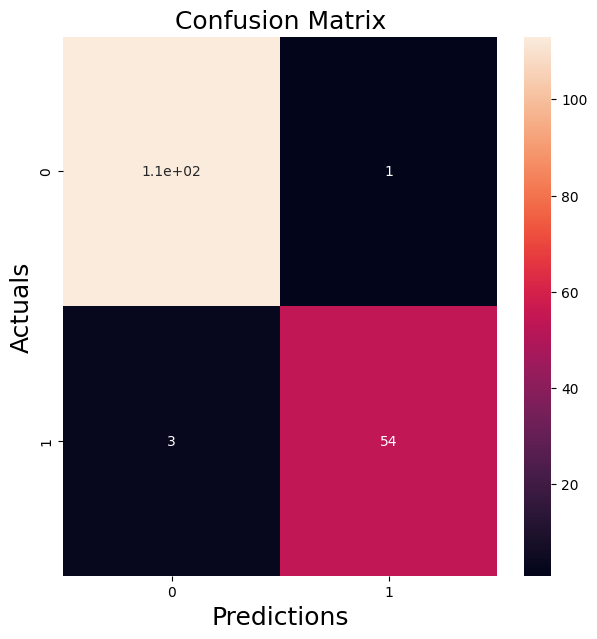

In [ ]:
#Using Confusion Matrix

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test,y_preds)
plt.figure(figsize=(7,7))
sns.heatmap(conf_matrix,annot=True)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report (y_test,y_preds))

              precision    recall  f1-score   support

           B       0.97      0.99      0.98       114
           M       0.98      0.95      0.96        57

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

